<a href="https://colab.research.google.com/github/victor-onoja/DeepLearningLearning/blob/main/Copy_of_Coding_Our_First_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Coding Our Model

Before we begin, go to Tools > Settings > Editor and check "Show line numbers." It'll help you follow along with the instructions in the lesson.

### Graphing the Data
This takes us right to where we left off. Make sure you remember how everything works.

Text(0, 0.5, 'Smartcase Grade')

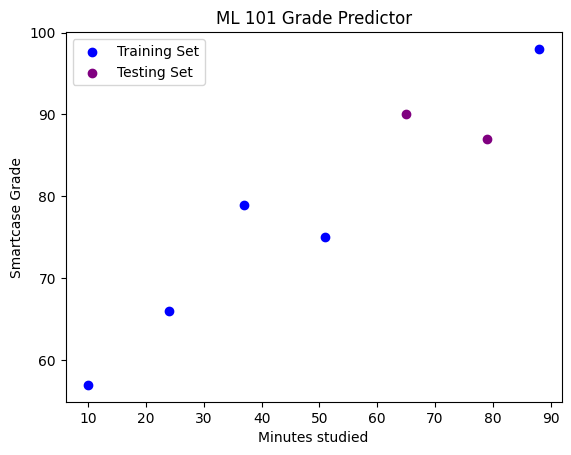

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X = np.array([10,24,37,51,65,79,88])
y = np.array([57,66,79,75,90,87,98])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

plt.scatter(X_train, y_train, color="blue", label="Training Set")
plt.scatter(X_test, y_test, color="purple", label="Testing Set")
plt.title("ML 101 Grade Predictor")
plt.legend()
plt.xlabel("Minutes studied")
plt.ylabel("Smartcase Grade")

### Creating the LinearRegression Class

In [2]:
class LinearRegression():

  def __init__(self, learning_rate, epochs, w=0, b=0): # add hyperparameters and parameters
    # assign all to object attributes
    self.learning_rate = learning_rate
    self.epochs = epochs
    self.w = w
    self.b = b

  def predict(self, X):
      y_predicted = self.w * X + self.b # what's the linear regression formula?
      return y_predicted

  def train(self, X, y):
    m = X.size # get the total number of examples, m

    for _ in range(self.epochs): # how do we determine the number of iterations?
      y_predicted = self.predict(X) # get the prediction
      dw = (1/m) * np.dot((y_predicted - y), X) # derivative of w
      db = (1/m) * np.sum(y_predicted - y) # derivative of b
      self.w -= self.learning_rate * dw # update w
      self.b -= self.learning_rate * db # update b

  def mse(self, y_predicted, y):
    m = X.size
    return (1/(2*m)) * np.sum((y_predicted - y)**2) # what's the MSE formula?

### Instantiating the Class

In [3]:
grade_predictor = LinearRegression(0.0008, 50000) # instantiate the class
grade_predictor.train(X_train, y_train) # what data goes first?
smartcase_predictions = grade_predictor.predict(X_test) # what data does predict need?
mse_value = grade_predictor.mse(smartcase_predictions, y_test) # what data does mse need?

### Graphing the Model

MSE of our test set: 3.836234132659739
Model's parameters are: w: 0.4974880631904154, b: 54.105347191124984


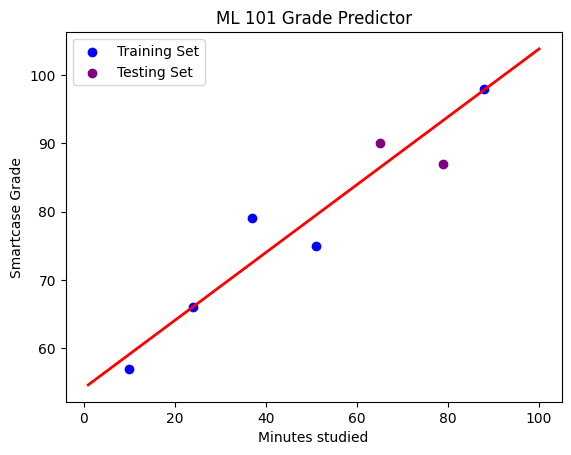

In [4]:
plt.scatter(X_train, y_train, color="blue", label="Training Set")
plt.scatter(X_test, y_test, color="purple", label="Testing Set")
plt.title("ML 101 Grade Predictor")
plt.legend()
plt.xlabel("Minutes studied")
plt.ylabel("Smartcase Grade")

x_data = np.linspace(1,100,100)
plt.plot(x_data, grade_predictor.w * x_data + grade_predictor.b,  color="red", linewidth=2, label="Prediction")
print(f"MSE of our test set: {mse_value}")
print(f"Model's parameters are: w: {grade_predictor.w}, b: {grade_predictor.b}")

### Deploying the Model

In [5]:
your_grade = grade_predictor.predict(60) # put the number of minutes you plan to study here
if(your_grade > 100):
  your_grade = 100
if(your_grade < 0):
  your_grade = 0
print(f"Our model predicts you'll earn a {round(your_grade,1)}% on the upcoming Quantic Smartcase.")
print(f"Formula used to make this prediction: y = {round(grade_predictor.w, 3)}x + {round(grade_predictor.b, 3)}")

Our model predicts you'll earn a 84.0% on the upcoming Quantic Smartcase.
Formula used to make this prediction: y = 0.497x + 54.105
